In [2]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager  # WebDriver Manager
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

import pandas as pd
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Define the output directory for saving CSV files
output_dir = 'financial_data'
os.makedirs(output_dir, exist_ok=True)


In [4]:
# Configure Chrome Options (can add headless mode if needed)
options = Options()

# Automatically download and configure ChromeDriver using WebDriver Manager
service = Service(ChromeDriverManager().install())  # WebDriver Manager takes care of driver installation
driver = webdriver.Chrome(service=service, options=options)

# Example usage: Open a webpage
driver.get("https://www.google.com")

# Print the page title to confirm it's loaded
print(driver.title)

# Close the browser after the task is done
driver.quit()

Google


In [ ]:
# Configure Chrome Options (can add headless mode if needed)
options = Options()

# Automatically download and configure ChromeDriver using WebDriver Manager
service = Service(ChromeDriverManager().install())  # WebDriver Manager takes care of driver installation
driver = webdriver.Chrome(service=service, options=options)


In [6]:
# Define the website and tabs to scrape
url = 'https://stockanalysis.com/stocks/gm/financials/'
tabs = {
    'Balance Sheet': "//a[contains(text(), 'Balance Sheet')]",
    'Cash Flow': "//a[contains(text(), 'Cash Flow')]",
    'Ratios': "//a[contains(text(), 'Ratios')]"
}


In [7]:
# Try to scrape data from the website
try:
    # 🌐 Open the Website
    print('🌐 Opening the website...')
    driver.get(url)
    WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))

    # 📸 Capture Debugging Screenshot
    driver.save_screenshot('page_debug.png')
    print('📸 Saved screenshot as \'page_debug.png\'')

    # Process the Income Statement (default tab)
    print('📄 Processing tab: Income Statement (default tab)...')
    try:
        table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//table[@data-test='financials']")))
        rows = table.find_elements(By.XPATH, ".//tr")
        table_data = []
        for row in rows:
            cells = row.find_elements(By.XPATH, ".//th | .//td")
            table_data.append([cell.text for cell in cells])

        # Convert to DataFrame
        df = pd.DataFrame(table_data[1:], columns=table_data[0])
        print(f'📊 Data extracted for Income Statement:\n', df.head())

        # Save to CSV
        output_file = os.path.join(output_dir, 'income_statement.csv')
        df.to_csv(output_file, index=False)
        print(f'💾 Data saved to {output_file}\n')

    except Exception as e:
        print(f'❌ Failed to extract table for Income Statement. Error: {e}')

    # Loop through remaining tabs and extract the table data
    for tab_name, tab_xpath in tabs.items():
        print(f'📄 Navigating to tab: {tab_name}...')

        try:
            tab_element = WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH, tab_xpath)))
            driver.execute_script('arguments[0].scrollIntoView({behavior: "smooth", block: "center"});', tab_element)
            time.sleep(1)  # Small delay to allow rendering

            WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, tab_xpath))).click()
            print(f'✅ Clicked on {tab_name}')

        except Exception as e:
            print(f'⚠️ Regular click failed for {tab_name}. Trying JavaScript click...')
            try:
                driver.execute_script('arguments[0].click();', tab_element)
                print(f'✅ JavaScript click successful for {tab_name}')
            except Exception as js_error:
                print(f'❌ JavaScript click failed for {tab_name}. Skipping tab. Error: {js_error}')
                continue  # Skip to the next tab

        time.sleep(2)  # Allow time for the table to load

        # Locate the financial table
        try:
            table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//table[@data-test='financials']")))
            rows = table.find_elements(By.XPATH, ".//tr")
            table_data = []
            for row in rows:
                cells = row.find_elements(By.XPATH, ".//th | .//td")
                table_data.append([cell.text for cell in cells])

            # Convert to DataFrame
            df = pd.DataFrame(table_data[1:], columns=table_data[0])
            print(f'📊 Data extracted for {tab_name}:\n', df.head())

            # Save to CSV
            output_file = os.path.join(output_dir, f'{tab_name.replace(" ", "_").lower()}.csv')
            df.to_csv(output_file, index=False)
            print(f'💾 Data saved to {output_file}\n')

        except Exception as e:
            print(f'❌ Failed to extract table for {tab_name}. Error: {e}')
            continue  # Skip to the next tab

except Exception as e:
    print(f'❌ An error occurred: {e}')

finally:
    driver.quit()
    print('🚪 Browser closed.')


🌐 Opening the website...
📸 Saved screenshot as 'page_debug.png'
📄 Processing tab: Income Statement (default tab)...
📊 Data extracted for Income Statement:
             Fiscal Year       FY 2024       FY 2023       FY 2022  \
0         Period Ending  Dec 31, 2024  Dec 31, 2023  Dec 31, 2022   
1     Operating Revenue       171,606       157,658       143,975   
2         Other Revenue        15,836        14,184        12,760   
3               Revenue       187,442       171,842       156,735   
4  Revenue Growth (YoY)         9.08%         9.64%        23.41%   

        FY 2021       FY 2020  2015 - 2019  
0  Dec 31, 2021  Dec 31, 2020  2015 - 2019  
1       113,590       108,673      Upgrade  
2        13,414        13,812      Upgrade  
3       127,004       122,485      Upgrade  
4         3.69%       -10.75%      Upgrade  
💾 Data saved to financial_data\income_statement.csv

📄 Navigating to tab: Balance Sheet...
⚠️ Regular click failed for Balance Sheet. Trying JavaScript click..

In [8]:
import pandas as pd

# Load the four CSV files into dataframes
balance_sheet_df = pd.read_csv('financial_data/balance_sheet.csv')
cashflow_df = pd.read_csv('financial_data/cash_flow.csv')
income_statement_df = pd.read_csv('financial_data/income_statement.csv')
ratios_df = pd.read_csv('financial_data/ratios.csv')

# Display the first few rows of each dataframe to inspect the data
print("Balance Sheet Data:")
print(balance_sheet_df.head())

print("\nCash Flow Data:")
print(cashflow_df.head())

print("\nIncome Statement Data:")
print(income_statement_df.head())

print("\nRatios Data:")
print(ratios_df.head())


Balance Sheet Data:
                     Fiscal Year       FY 2024       FY 2023       FY 2022  \
0                  Period Ending  Dec 31, 2024  Dec 31, 2023  Dec 31, 2022   
1             Cash & Equivalents        14,772        13,553        15,153   
2         Short-Term Investments         7,265         7,613        12,150   
3  Cash & Short-Term Investments        22,037        21,166        27,303   
4                    Cash Growth         4.12%       -22.48%        10.65%   

        FY 2021       FY 2020  2015 - 2019  
0  Dec 31, 2021  Dec 31, 2020  2015 - 2019  
1        16,067        14,892      Upgrade  
2         8,609         9,046      Upgrade  
3        24,676        23,938      Upgrade  
4         3.08%        20.03%      Upgrade  

Cash Flow Data:
                             Fiscal Year       FY 2024       FY 2023  \
0                          Period Ending  Dec 31, 2024  Dec 31, 2023   
1                             Net Income         6,008        10,127   
2       

In [9]:
# Check for missing values in each dataframe
print("Balance Sheet Missing Values:")
print(balance_sheet_df.isnull().sum())

print("\nCash Flow Missing Values:")
print(cashflow_df.isnull().sum())

print("\nIncome Statement Missing Values:")
print(income_statement_df.isnull().sum())

print("\nRatios Missing Values:")
print(ratios_df.isnull().sum())


Balance Sheet Missing Values:
Fiscal Year    0
FY 2024        0
FY 2023        0
FY 2022        0
FY 2021        0
FY 2020        0
2015 - 2019    0
dtype: int64

Cash Flow Missing Values:
Fiscal Year    0
FY 2024        0
FY 2023        0
FY 2022        0
FY 2021        0
FY 2020        0
2015 - 2019    0
dtype: int64

Income Statement Missing Values:
Fiscal Year    0
FY 2024        0
FY 2023        0
FY 2022        0
FY 2021        0
FY 2020        0
2015 - 2019    0
dtype: int64

Ratios Missing Values:
Fiscal Year    0
Current        0
FY 2024        0
FY 2023        0
FY 2022        0
FY 2021        0
FY 2020        0
2015 - 2019    0
dtype: int64


In [10]:
# Get summary statistics for each dataframe
print("Balance Sheet Summary:")
print(balance_sheet_df.describe())

print("\nCash Flow Summary:")
print(cashflow_df.describe())

print("\nIncome Statement Summary:")
print(income_statement_df.describe())

print("\nRatios Summary:")
print(ratios_df.describe())


Balance Sheet Summary:
          Fiscal Year  FY 2024 FY 2023 FY 2022 FY 2021 FY 2020 2015 - 2019
count              51       51      51      51      51      51          51
unique             51       50      49      49      49      49           2
top     Period Ending  279,761  12,378  13,333   7,394   8,035     Upgrade
freq                1        2       2       2       2       2          50

Cash Flow Summary:
          Fiscal Year FY 2024 FY 2023 FY 2022 FY 2021 FY 2020 2015 - 2019
count              42      42      42      42      42      42          42
unique             42      39      40      39      36      39           2
top     Period Ending       -  50,963       -       -       -     Upgrade
freq                1       2       2       2       6       2          41

Income Statement Summary:
          Fiscal Year  FY 2024  FY 2023  FY 2022 FY 2021  FY 2020 2015 - 2019
count              49       49       49       49      49       49          49
unique             49       4

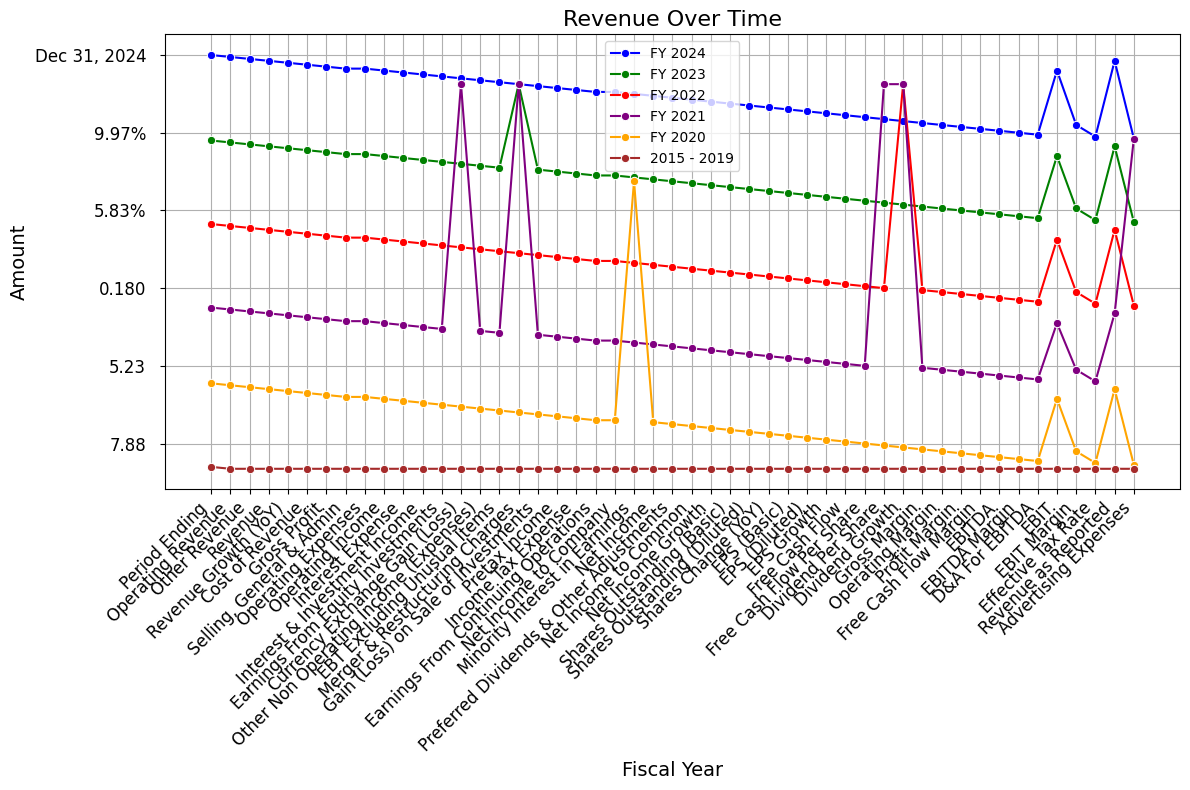

In [11]:
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing

# Plotting Revenue
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='FY 2024', label='FY 2024', marker='o', color='blue')
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='FY 2023', label='FY 2023', marker='o', color='green')
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='FY 2022', label='FY 2022', marker='o', color='red')
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='FY 2021', label='FY 2021', marker='o', color='purple')
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='FY 2020', label='FY 2020', marker='o', color='orange')
sns.lineplot(data=income_statement_df, x='Fiscal Year', y='2015 - 2019', label='2015 - 2019', marker='o', color='brown')

plt.title('Revenue Over Time', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis labels by setting tick locations and limits
plt.yticks(fontsize=12)

# Limit the number of ticks on the y-axis using `nbins`
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='lower', nbins=6))

# Add padding between the y-axis and labels
plt.gca().tick_params(axis='y', pad=10)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd

balance_sheet_df = pd.DataFrame({
    # Example data (replace this with your actual data)
    'Fiscal Year': ['FY 2024', 'FY 2023', 'FY 2022'],
    'Cash & Equivalents': ['14,772', '13,553', '15,153'],
    'Short-Term Investments': ['7,265', '7,613', '12,150']
})

# Convert the 'Cash & Equivalents' column to numeric values (removing commas if present)
balance_sheet_df['Cash & Equivalents'] = pd.to_numeric(balance_sheet_df['Cash & Equivalents'].str.replace(',', ''), errors='coerce')

# Now calculate the cash growth using pct_change
cash_equivalents = balance_sheet_df['Cash & Equivalents']

# Calculate percentage change (excluding the first row which will be NaN)
cash_growth = cash_equivalents.pct_change() * 100

# Display the Cash Growth trend
print("Cash Growth Trend (Year-on-Year):")
print(cash_growth)


Cash Growth Trend (Year-on-Year):
0          NaN
1    -8.252099
2    11.805504
Name: Cash & Equivalents, dtype: float64


In [13]:
print(cashflow_df.columns)


Index(['Fiscal Year', 'FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020',
       '2015 - 2019'],
      dtype='object')


In [14]:
# Net Income over the years
net_income_row = cashflow_df[cashflow_df['Fiscal Year'] == 'Net Income']

# Depreciation & Amortization trend
depreciation_amortization_row = cashflow_df[cashflow_df['Fiscal Year'] == 'Depreciation & Amortization']

# Asset Writedown & Restructuring Costs trend
asset_writedown_row = cashflow_df[cashflow_df['Fiscal Year'] == 'Asset Writedown & Restructuring Costs']

# Display trends
print("Net Income Trend:")
print(net_income_row)

print("\nDepreciation & Amortization Trend:")
print(depreciation_amortization_row)

print("\nAsset Writedown & Restructuring Costs Trend:")
print(asset_writedown_row)


Net Income Trend:
  Fiscal Year FY 2024 FY 2023 FY 2022 FY 2021 FY 2020 2015 - 2019
1  Net Income   6,008  10,127   9,934  10,019   6,427     Upgrade

Depreciation & Amortization Trend:
                   Fiscal Year FY 2024 FY 2023 FY 2022 FY 2021 FY 2020  \
2  Depreciation & Amortization   5,970   6,164   5,825   5,460   5,094   

  2015 - 2019  
2     Upgrade  

Asset Writedown & Restructuring Costs Trend:
                             Fiscal Year FY 2024 FY 2023 FY 2022 FY 2021  \
4  Asset Writedown & Restructuring Costs   1,076     209      12       -   

  FY 2020 2015 - 2019  
4     139     Upgrade  


In [15]:
# Extract values (drop the 'Fiscal Year' column)
net_income_values = net_income_row.drop(columns=['Fiscal Year']).values.flatten()
depreciation_amortization_values = depreciation_amortization_row.drop(columns=['Fiscal Year']).values.flatten()
asset_writedown_values = asset_writedown_row.drop(columns=['Fiscal Year']).values.flatten()


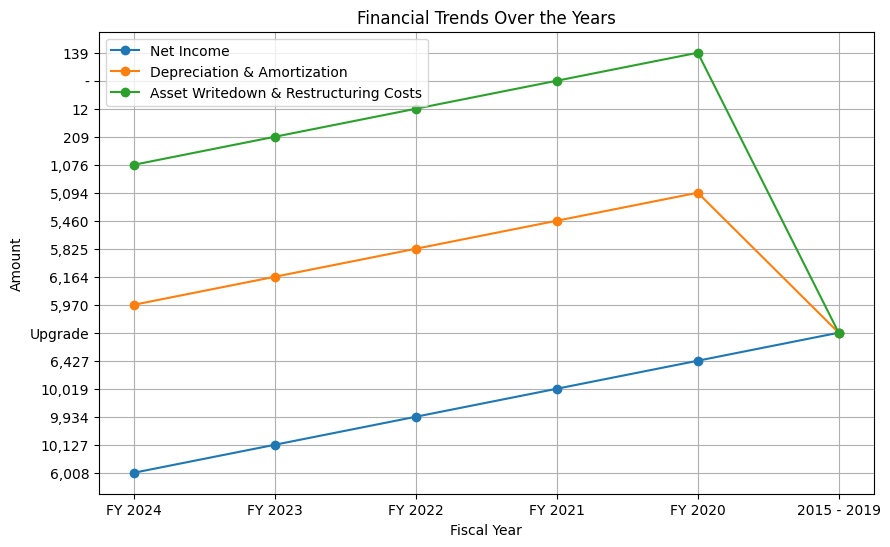

In [16]:
import matplotlib.pyplot as plt

years = ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020', '2015 - 2019']

plt.figure(figsize=(10, 6))

# Plot Net Income
plt.plot(years, net_income_values, label='Net Income', marker='o')

# Plot Depreciation & Amortization
plt.plot(years, depreciation_amortization_values, label='Depreciation & Amortization', marker='o')

# Plot Asset Writedown
plt.plot(years, asset_writedown_values, label='Asset Writedown & Restructuring Costs', marker='o')

plt.title('Financial Trends Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Function to clean values
def clean_numeric_array(values):
    # Force strings
    values = values.astype(str)
    # Remove commas
    values = np.char.replace(values, ',', '')
    # Keep only values that are numeric
    values = np.array([v for v in values if v.replace('.', '', 1).isdigit()])
    # Convert to float
    return values.astype(float)

# Apply cleaning
net_income_values = clean_numeric_array(net_income_row.iloc[:, 1:].values.flatten())
depreciation_amortization_values = clean_numeric_array(depreciation_amortization_row.iloc[:, 1:].values.flatten())
asset_writedown_values = clean_numeric_array(asset_writedown_row.iloc[:, 1:].values.flatten())


Mismatch in the number of data points for Asset Writedown & Restructuring Costs


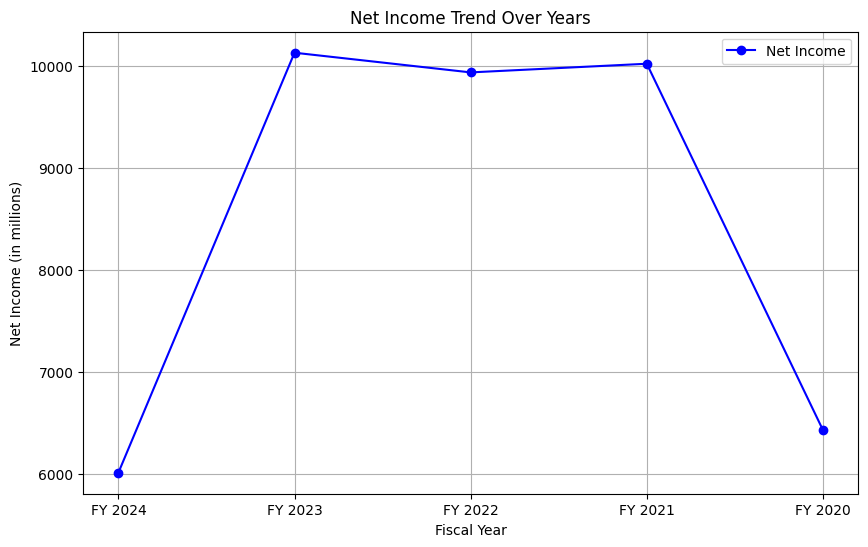

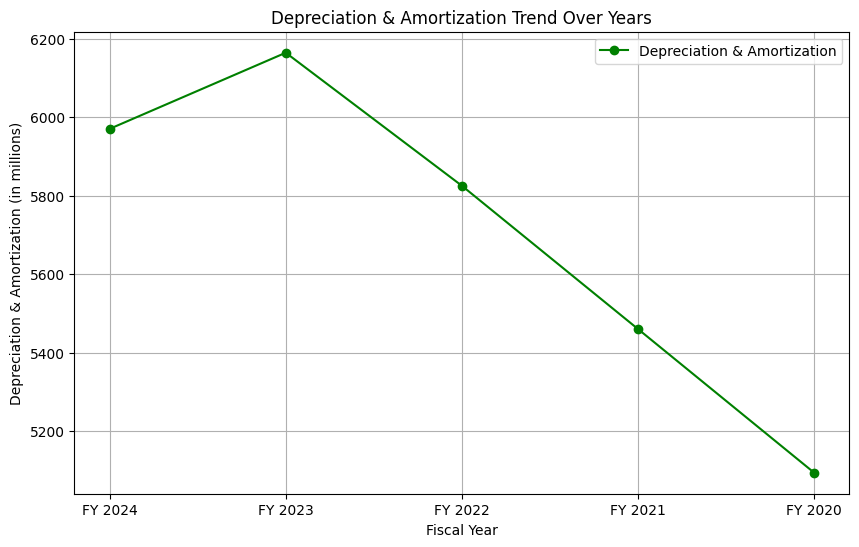

Data for Asset Writedown & Restructuring Costs doesn't match the number of years.


In [18]:

# Set the x-axis labels (Fiscal Years)
years = ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020']

# Ensure the data arrays have the same length as the years array
if len(net_income_values) != len(years):
    print("Mismatch in the number of data points for Net Income")
if len(depreciation_amortization_values) != len(years):
    print("Mismatch in the number of data points for Depreciation & Amortization")
if len(asset_writedown_values) != len(years):
    print("Mismatch in the number of data points for Asset Writedown & Restructuring Costs")

# Plot Net Income trend
plt.figure(figsize=(10, 6))
plt.plot(years, net_income_values, marker='o', label='Net Income', color='b')
plt.title('Net Income Trend Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (in millions)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Depreciation & Amortization trend
plt.figure(figsize=(10, 6))
plt.plot(years, depreciation_amortization_values, marker='o', label='Depreciation & Amortization', color='g')
plt.title('Depreciation & Amortization Trend Over Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Depreciation & Amortization (in millions)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Asset Writedown & Restructuring Costs trend
# Check if data matches year count, if not, adjust accordingly
if len(asset_writedown_values) == len(years):
    plt.figure(figsize=(10, 6))
    plt.plot(years, asset_writedown_values, marker='o', label='Asset Writedown & Restructuring Costs', color='r')
    plt.title('Asset Writedown & Restructuring Costs Trend Over Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Asset Writedown & Restructuring Costs (in millions)')
    plt.grid(True)
    plt.legend()
    plt.show()
else:
    print("Data for Asset Writedown & Restructuring Costs doesn't match the number of years.")


In [19]:

cashflow_df = pd.read_csv('financial_data/cash_flow.csv')

# Strip any leading/trailing whitespaces from column names
cashflow_df.columns = cashflow_df.columns.str.strip()

# Drop rows where the 'Fiscal Year' is NaN or empty
cashflow_df = cashflow_df.dropna(subset=['Fiscal Year'])

# Remove unwanted rows (like the one with 'Upgrade')
cashflow_df = cashflow_df[cashflow_df['Fiscal Year'] != 'Upgrade']

# Remove commas in numeric columns (like Net Income, Depreciation & Amortization, etc.)
numeric_columns = cashflow_df.columns[1:]  # Assuming first column is 'Fiscal Year'
for col in numeric_columns:
    cashflow_df[col] = cashflow_df[col].replace({',': ''}, regex=True)

# Convert relevant columns to numeric values (ignoring errors)
for col in numeric_columns:
    cashflow_df[col] = pd.to_numeric(cashflow_df[col], errors='coerce')

# Reset index for a clean DataFrame
cashflow_df.reset_index(drop=True, inplace=True)

# Save the cleaned DataFrame to a new CSV file
cashflow_df.to_csv('cleaned_financial_data.csv', index=False)

# Display cleaned data
print("Cleaned financial data:")
print(cashflow_df.head())


Cleaned financial data:
                             Fiscal Year  FY 2024  FY 2023  FY 2022  FY 2021  \
0                          Period Ending      NaN      NaN      NaN      NaN   
1                             Net Income   6008.0  10127.0   9934.0  10019.0   
2            Depreciation & Amortization   5970.0   6164.0   5825.0   5460.0   
3                     Other Amortization   5598.0   5605.0   5453.0   6591.0   
4  Asset Writedown & Restructuring Costs   1076.0    209.0     12.0      NaN   

   FY 2020  2015 - 2019  
0      NaN          NaN  
1   6427.0          NaN  
2   5094.0          NaN  
3   7582.0          NaN  
4    139.0          NaN  


In [20]:
# Descriptive statistics
summary_stats = cashflow_df.describe()

# Display summary stats
print("Descriptive statistics:")
print(summary_stats)


Descriptive statistics:
            FY 2024       FY 2023       FY 2022       FY 2021       FY 2020  \
count     36.000000     37.000000     36.000000     32.000000     36.000000   
mean    1552.173333   1294.494054   1359.935556   1275.163438   1610.024444   
std    17600.871196  17089.285558  15656.481874  17820.970845  26251.599232   
min   -43399.000000 -44831.000000 -39606.000000 -47806.000000 -72663.000000   
25%     -685.500000   -757.000000  -2422.750000   -598.750000   -669.000000   
50%      856.500000     54.000000    233.000000    525.000000    172.000000   
75%     5683.250000   5034.000000   5904.750000   5685.250000   6117.000000   
max    53563.000000  50963.000000  46186.000000  48212.000000  78804.000000   

       2015 - 2019  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  


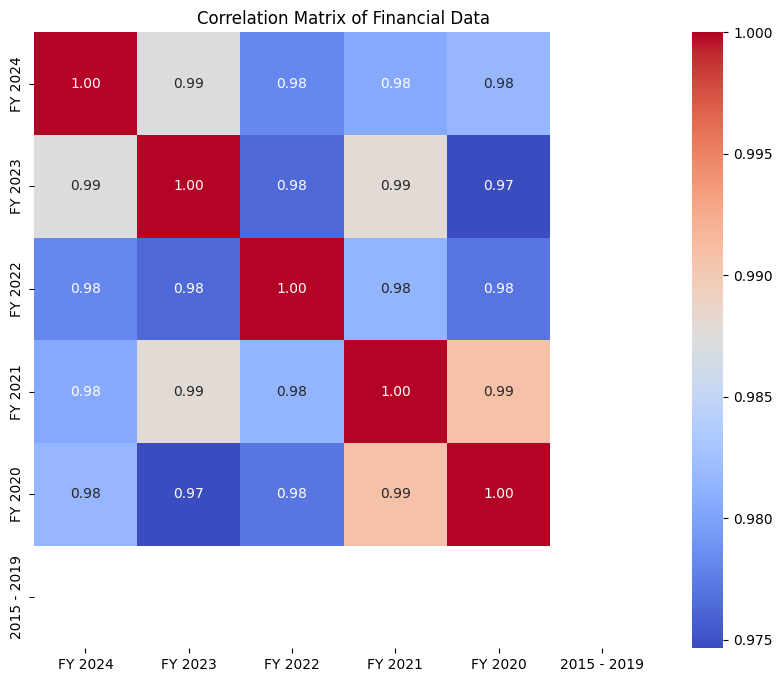

In [21]:
# Drop the non-numeric 'Fiscal Year' column
numeric_df = cashflow_df.drop(columns=['Fiscal Year'])

# Now calculate the correlation matrix on the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Financial Data')
plt.show()


In [22]:
# Check the data types of each column to identify non-numeric ones
print(cashflow_df.dtypes)


Fiscal Year     object
FY 2024        float64
FY 2023        float64
FY 2022        float64
FY 2021        float64
FY 2020        float64
2015 - 2019    float64
dtype: object


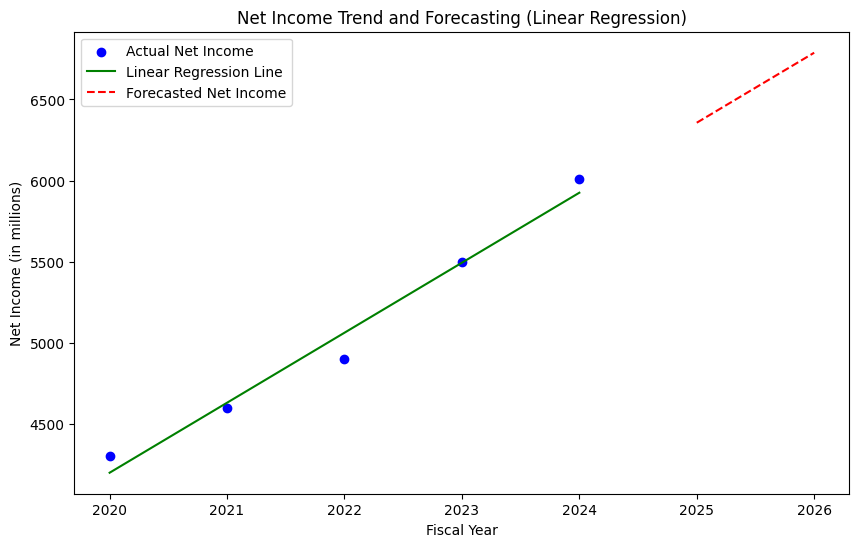

Forecasted Net Income for 2025: 6356.40
Forecasted Net Income for 2026: 6788.00


In [23]:

from sklearn.linear_model import LinearRegression
# Prepare data for Linear Regression
years = np.array([2024, 2023, 2022, 2021, 2020]).reshape(-1, 1)  # Example years
net_income_values = np.array([6008, 5500, 4900, 4600, 4300])  # Example Net Income values

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(years, net_income_values)

# Predict future years (e.g., 2025 and 2026)
future_years = np.array([2025, 2026]).reshape(-1, 1)
predictions = model.predict(future_years)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(years, net_income_values, color='blue', label='Actual Net Income')
plt.plot(years, model.predict(years), color='green', label='Linear Regression Line')
plt.plot(future_years, predictions, color='red', linestyle='--', label='Forecasted Net Income')
plt.title('Net Income Trend and Forecasting (Linear Regression)')
plt.xlabel('Fiscal Year')
plt.ylabel('Net Income (in millions)')
plt.legend()
plt.show()

# Print the forecasted values for 2025 and 2026
print(f"Forecasted Net Income for 2025: {predictions[0]:.2f}")
print(f"Forecasted Net Income for 2026: {predictions[1]:.2f}")


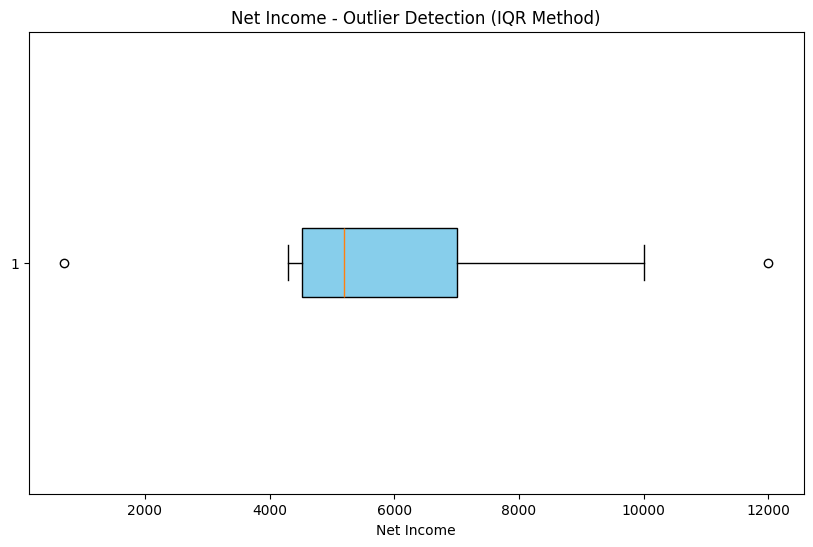

Outliers detected: [  700 12000]


In [24]:

# Example data: Net Income values
net_income_values = np.array([6008, 5500, 4900, 4600, 4300, 10000, 700, 12000])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(net_income_values, 25)
Q3 = np.percentile(net_income_values, 75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = net_income_values[(net_income_values < lower_bound) | (net_income_values > upper_bound)]

# Visualize the data and outliers
plt.figure(figsize=(10, 6))
plt.boxplot(net_income_values, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Net Income - Outlier Detection (IQR Method)')
plt.xlabel('Net Income')
plt.show()

# Print outliers
print(f"Outliers detected: {outliers}")


In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot trends if lengths match
if len(years) == len(net_income_values) == len(depreciation_amortization_values) == len(asset_writedown_values):
    plt.figure(figsize=(10, 6))

    # Plot Net Income
    plt.plot(years, net_income_values, marker='o', label='Net Income', color='b')

    # Plot Depreciation & Amortization
    plt.plot(years, depreciation_amortization_values, marker='o', label='Depreciation & Amortization', color='g')

    # Plot Asset Writedown & Restructuring Costs
    plt.plot(years, asset_writedown_values, marker='o', label='Asset Writedown & Restructuring Costs', color='r')

    # Adding labels and title
    plt.title('Financial Trends Over the Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Amount in $')

    # Rotate x-axis labels for clarity
    plt.xticks(rotation=45, ha="right")

    # Use MaxNLocator to control number of ticks (adjust `nbins` to control the number of ticks)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

    # Add legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Mismatch in data length. Please verify the data.")


Mismatch in data length. Please verify the data.


In [26]:
# Fill NaN values with 0 (or you could use another method depending on the context)
cashflow_df.fillna(0, inplace=True)

# Verify if missing values still exist
print(cashflow_df.isna().sum())


Fiscal Year    0
FY 2024        0
FY 2023        0
FY 2022        0
FY 2021        0
FY 2020        0
2015 - 2019    0
dtype: int64


In [ ]:
import pandas as pd

# Sample data
data = {
    'Fiscal Year': ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020', '2015 - 2019'],
    'Revenue': [100, 120, 150, 140, 130, 200],
    'Net Income': [30, 40, 50, 60, 45, 70]
}
df = pd.DataFrame(data)

# 1. Extract the four-digit year; this will turn '2015 - 2019' into '2015'
df['Year'] = df['Fiscal Year'].str.extract(r'(\d{4})').astype(int)

# 2. (Optional) Drop the original aggregated row if you don't want a single year representation
#    Or choose to keep it by assigning a meaningful single year.
df = df.dropna(subset=['Year'])  # drops any row where no year could be extracted

# 3. Convert to datetime using the extracted year
df['Fiscal Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

# 4. Now set as index
df.set_index('Fiscal Year', inplace=True)

# 5. Drop the helper column
df.drop(columns=['Year'], inplace=True)

print(df)


             Revenue  Net Income
Fiscal Year                     
2024-01-01       100          30
2023-01-01       120          40
2022-01-01       150          50
2021-01-01       140          60
2020-01-01       130          45
2015-01-01       200          70


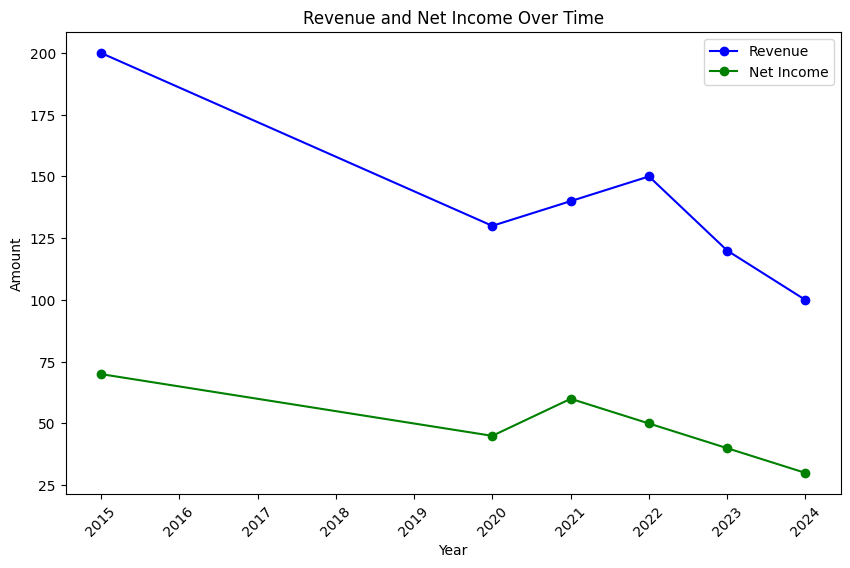

In [29]:

# Plotting Revenue and Net Income
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Revenue'], label='Revenue', marker='o', color='blue')
plt.plot(df.index, df['Net Income'], label='Net Income', marker='o', color='green')
plt.title('Revenue and Net Income Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [30]:
from statsmodels.tsa.stattools import adfuller

# Function to check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Check stationarity of Revenue and Net Income
check_stationarity(df['Revenue'])
check_stationarity(df['Net Income'])


ADF Statistic: -0.7377445721257585
p-value: 0.8367291554685568
ADF Statistic: -1.7320508075688779
p-value: 0.4146791580296235


In [31]:
# Differencing the data if needed
df['Revenue_diff'] = df['Revenue'].diff().dropna()
df['Net_Income_diff'] = df['Net Income'].diff().dropna()

# Recheck stationarity for the differenced series
check_stationarity(df['Revenue_diff'].dropna())
check_stationarity(df['Net_Income_diff'].dropna())


ADF Statistic: -1.4039564630001886
p-value: 0.5803778774568018
ADF Statistic: -2.9
p-value: 0.04534799747216563


In [42]:
# 1. Inspect the actual columns
print(cashflow_df.columns)


Index(['Fiscal Year', 'FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020',
       '2015 - 2019'],
      dtype='object')


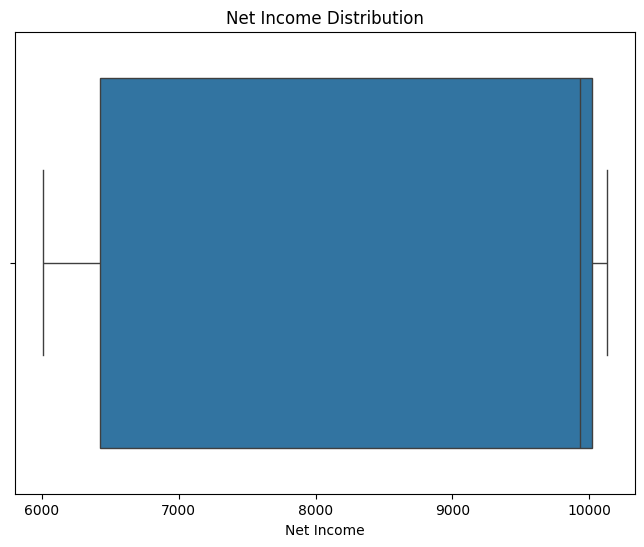

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract the Net Income row
net_income_row = income_statement_df[income_statement_df['Fiscal Year'] == 'Net Income']

# 2. Pull out the year-columns and clean them
years = ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020', '2015 - 2019']
net_income_values = net_income_row[years].values.flatten().astype(str)

# Remove commas and non-numeric entries, convert to float
net_income_clean = [float(v.replace(',', '')) for v in net_income_values if v.replace(',', '').isdigit()]

# 3. Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=net_income_clean)
plt.title('Net Income Distribution')
plt.xlabel('Net Income')
plt.show()


In [79]:
print(cashflow_df['Fiscal Year'].tolist())


['Period Ending', 'Net Income', 'Depreciation & Amortization', 'Other Amortization', 'Asset Writedown & Restructuring Costs', 'Loss (Gain) on Equity Investments', 'Other Operating Activities', 'Change in Accounts Receivable', 'Change in Inventory', 'Change in Accounts Payable', 'Change in Income Taxes', 'Change in Other Net Operating Assets', 'Operating Cash Flow', 'Operating Cash Flow Growth', 'Capital Expenditures', 'Investment in Securities', 'Other Investing Activities', 'Investing Cash Flow', 'Short-Term Debt Issued', 'Long-Term Debt Issued', 'Total Debt Issued', 'Short-Term Debt Repaid', 'Long-Term Debt Repaid', 'Total Debt Repaid', 'Net Debt Issued (Repaid)', 'Repurchase of Common Stock', 'Common Dividends Paid', 'Dividends Paid', 'Other Financing Activities', 'Financing Cash Flow', 'Foreign Exchange Rate Adjustments', 'Miscellaneous Cash Flow Adjustments', 'Net Cash Flow', 'Free Cash Flow', 'Free Cash Flow Growth', 'Free Cash Flow Margin', 'Free Cash Flow Per Share', 'Cash Inte

Years with numeric data: ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020', '2015 - 2019']
Depreciation values: [5970.0, 6164.0, 5825.0, 5460.0, 5094.0, 0.0]


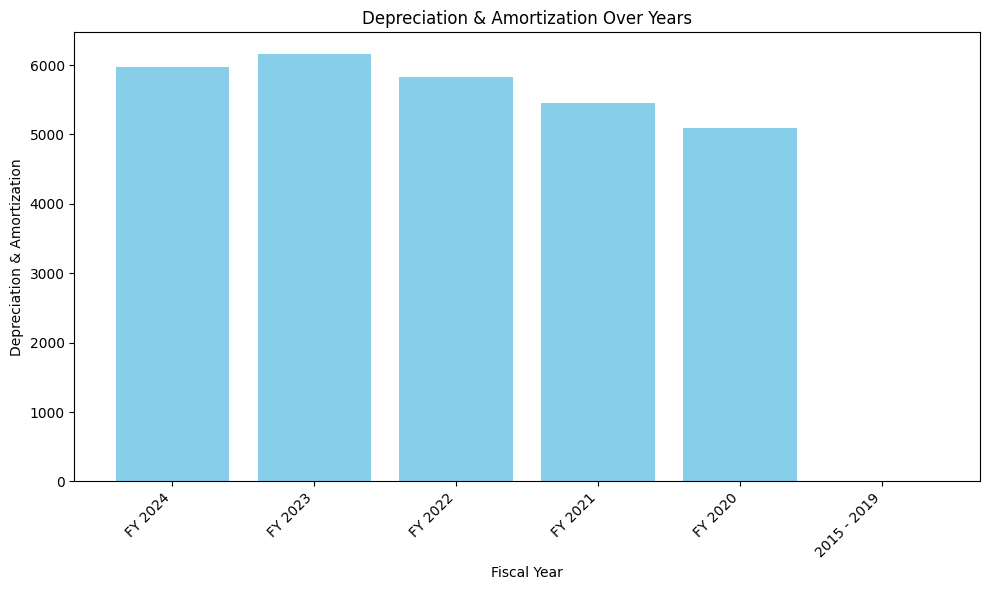

In [40]:
import matplotlib.pyplot as plt

# 1. Extract the Depreciation & Amortization row
dep_row = cashflow_df[cashflow_df['Fiscal Year'] == 'Depreciation & Amortization']

# 2. List the year columns you want
years = ['FY 2024', 'FY 2023', 'FY 2022', 'FY 2021', 'FY 2020', '2015 - 2019']

# 3. Convert values to float, skipping anything that fails
dep_clean = []
dep_years = []
for col in years:
    val = dep_row[col].values[0]  # get the single cell
    try:
        # Remove commas, then convert
        num = float(str(val).replace(',', ''))
        dep_clean.append(num)
        dep_years.append(col)
    except Exception:
        # Skip non-numeric entries
        continue

# 4. Check what we have
print("Years with numeric data:", dep_years)
print("Depreciation values:", dep_clean)

# 5. Plot if we have data
if dep_clean:
    plt.figure(figsize=(10, 6))
    plt.bar(dep_years, dep_clean, color='skyblue')
    plt.title('Depreciation & Amortization Over Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Depreciation & Amortization')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Still no numeric data found—please verify the DataFrame contents.")
